In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pyproj

from netCDF4 import Dataset

USER = os.getenv('USER')
PROJ = pyproj.Proj(proj='stere',  a=6378273, b=6378273, lon_0=-45, lat_0=90, lat_ts=90)

In [2]:
# netCDF file with hourly averages
ncfile = f'/data2/{USER}/fran/Moorings_2023d001.nc'

# 12:00
t0 = 12

# open file and read some variables
with Dataset(ncfile) as d:
    lon = d['longitude'][:]
    lat = d['latitude'][:]
    siu = d['siu'][t0].filled(np.nan)
    siv = d['siv'][t0].filled(np.nan)
    sic = d['sic'][t0].filled(np.nan)
    wndx = d['wndx'][t0].filled(np.nan)
    wndy = d['wndy'][t0].filled(np.nan)
    taux = d['taux'][t0].filled(np.nan)
    tauy = d['tauy'][t0].filled(np.nan)
    tau_ax = d['tau_ax'][t0].filled(np.nan)
    tau_ay = d['tau_ay'][t0].filled(np.nan)

# convert lon, lat to X, Y in polar stereopgraphic projection
# and get vectors of X and Y coordinates
x_grd, y_grd = PROJ(lon,lat)
x_vec = x_grd[0]
y_vec = y_grd[:,0]



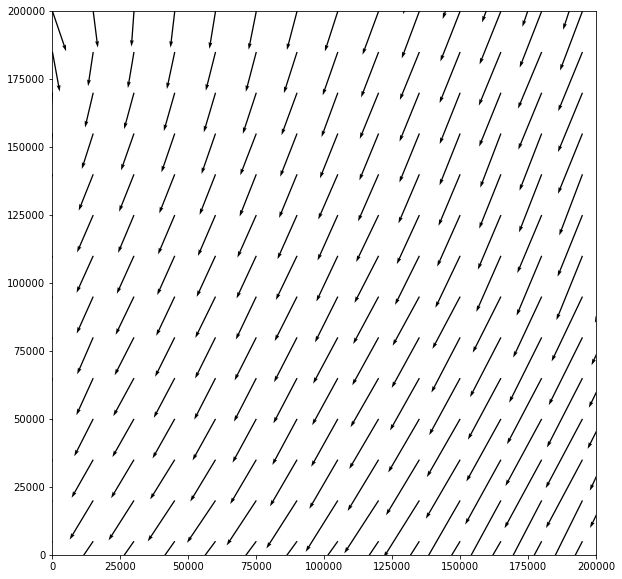

In [3]:
# plot average drift for 2023-01-01 12:00 - 13:00
stp = 5
plt.figure(figsize=(10,10))
plt.quiver(x_vec[::stp], y_vec[::stp], siu[::stp, ::stp], siv[::stp, ::stp], scale=1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

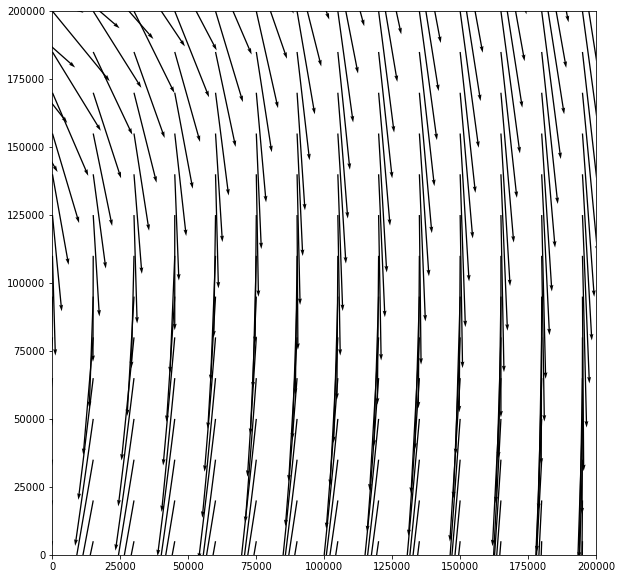

In [4]:
# plot average windspeed for 2023-01-01 12:00 - 13:00
stp = 5
plt.figure(figsize=(10,10))
plt.quiver(x_vec[::stp], y_vec[::stp], wndx[::stp, ::stp], wndy[::stp, ::stp], scale=20)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

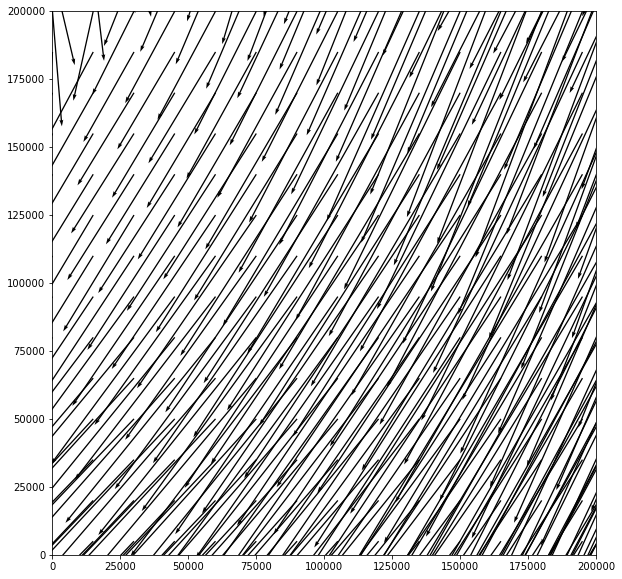

In [5]:
# plot average total drag (from both atmosphere and ocean) for 2023-01-01 12:00 - 13:00
stp = 5
plt.figure(figsize=(10,10))
plt.quiver(x_vec[::stp], y_vec[::stp], taux[::stp, ::stp], tauy[::stp, ::stp], scale=0.1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

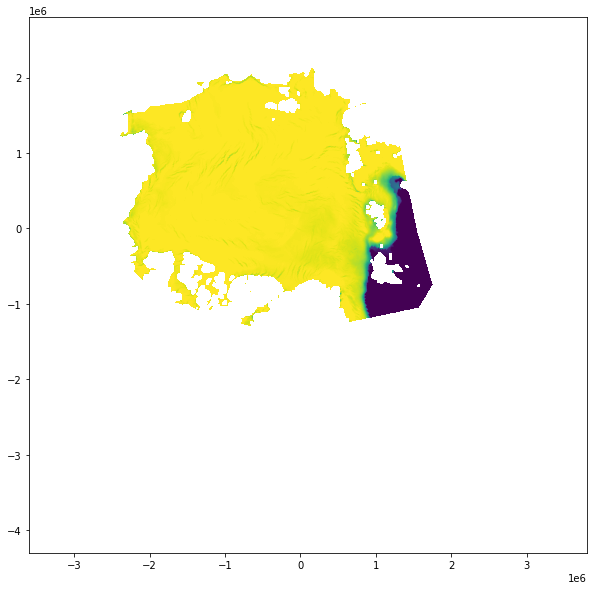

In [6]:
# plot average sea ice concentration for 2023-01-01 12:00 - 13:00
stp = 5
plt.figure(figsize=(10,10))
plt.imshow(sic, extent=[x_vec.min(), x_vec.max(), y_vec.min(), y_vec.max()], origin='lower')
plt.gca().set_aspect('equal')